## Pix2Pix for Satellite-to-Map Image Translation - Data Preparation
This notebook contains the code for the data preparation to train a pix2pix GAN [Keras](https://keras.io/) implementation from [Jason Brownlee](https://machinelearningmastery.com/how-to-develop-a-pix2pix-gan-for-image-to-image-translation/) following [this paper](https://arxiv.org/abs/1611.07004). The official paper implementation is in PyTorch. The purpose of the Keras model would be satellite images translation into Google Maps images.  
Execution of the code in this notebook requires a standard CPU runtime. No hardware acceleration needed.

Download the maps dataset from the Berkley pix2pix site.

In [ ]:
!wget http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz

--2021-10-20 08:24:52--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250242400 (239M) [application/x-gzip]
Saving to: ‘maps.tar.gz’

maps.tar.gz         100%[===================>] 238.65M  2.90MB/s    in 95s     

2021-10-20 08:26:27 (2.52 MB/s) - ‘maps.tar.gz’ saved [250242400/250242400]



Extract the archive content.

In [ ]:
!tar -xf ./maps.tar.gz
!rm ./maps.tar.gz

### Data Analysis

Define a function to count the images in each directory (training and test).

In [ ]:
import os

def count_images(filepath):
  total_files = 0

  for base, dirs, files in os.walk(filepath):
    print('Searching in : ',base)
    for image_file in files:
        total_files += 1

  print('Total number of images = ', total_files)

Define a function to display a given number of training or test images.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

def display_images(filepath, image_count):
  image_index = 0
  columns=1

  fig, axes = plt.subplots(nrows=image_count, ncols=columns, figsize=(20, 20))

  for base, dirs, files in os.walk(filepath):
    print('Searching in : ',base)
    for image_file in files:
      single_image = img.imread(os.path.join(filepath, image_file))
      axes[image_index].imshow(single_image)
      axes[image_index].set_title(image_file)
      image_index += 1
      if image_index >= image_count:
        break

Count the number of training and test images in the downloaded dataset.

In [ ]:
train_images_dir = './maps/train'
test_images_dir = './maps/val'

In [ ]:
count_images(train_images_dir)
count_images(test_images_dir)

Searching in :  ./maps/train
Total number of images =  1096
Searching in :  ./maps/val
Total number of images =  1098


Display some training images.

Searching in :  ./maps/train


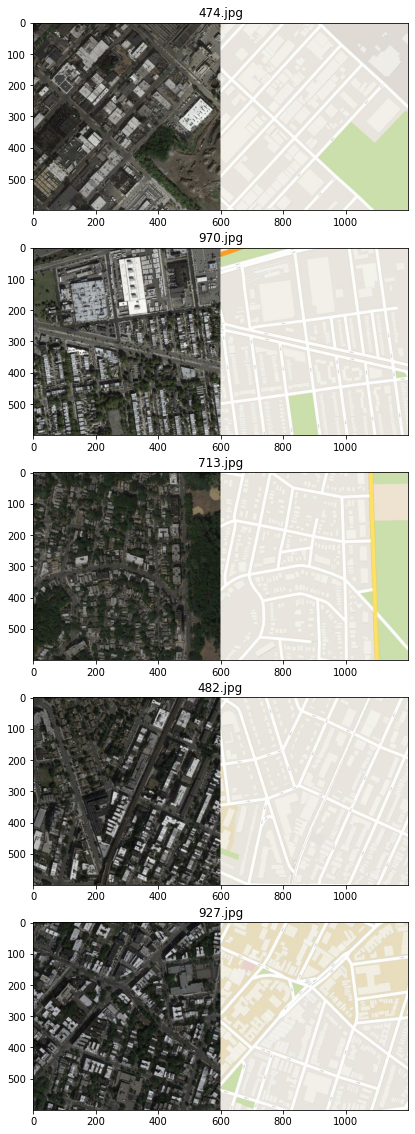

In [ ]:
image_count = 5
display_images(train_images_dir, image_count)

Each image is 1200 pixels wide and 600 pixels tall and contains both the satellite image (on the left) and the corresponding Google Maps image (on the right).

### Data Preparation

Each image in the training dataset needs first to be rescaled to 512 pixels width and 256 pixels height, then split in two parts (satellite and Google Maps).

In [ ]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

In [ ]:
def load_images(path, size=(256,512)):
	src_list, tar_list = list(), list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(os.path.join(path, filename), target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# split into satellite and map
		sat_img, map_img = pixels[:, :256], pixels[:, 256:]
		src_list.append(sat_img)
		tar_list.append(map_img)
	return [asarray(src_list), asarray(tar_list)]

In [ ]:
[src_images, tar_images] = load_images(train_images_dir)
print('Loaded: ', src_images.shape, tar_images.shape)

Loaded:  (1096, 256, 256, 3) (1096, 256, 256, 3)


Finally we save the transformed images into a compressed Numpy array format.

In [ ]:
training_data_np_array_filename = 'maps_256.npz'
savez_compressed(training_data_np_array_filename, src_images, tar_images)

Let's do a check that everything went fine.

Loaded:  (1096, 256, 256, 3) (1096, 256, 256, 3)


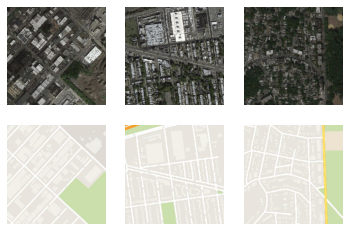

In [ ]:
from numpy import load

data = load('maps_256.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + i)
	plt.axis('off')
	plt.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + n_samples + i)
	plt.axis('off')
	plt.imshow(tar_images[i].astype('uint8'))
plt.show()

Mount your Google Drive. After executing the code in the cell below, a URL will be shown in the cell output. Click on it, follow the provided instruction and finally enter here the generated authorization code in order to complete the mount task.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Copy the compressed array file to your Google Drive, so that you can use it for training the model any time with no need for repeating this data preparation.

In [ ]:
import shutil

source = '/content/maps_256.npz'
destination = '/content/gdrive/MyDrive/maps_256.npz'
try:
    shutil.copy(source, destination)
    print("File copied successfully.")
except:
    print("Error occurred while copying file.")

File copied successfully.


Unmount your Google Drive before stopping the runtime.

In [ ]:
drive.flush_and_unmount() 

All changes made in this colab session should now be visible in Drive.
